In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import math

In [10]:
# read image
img = cv2.imread('anh.png')
# convert to gray scale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) # color -> gray
edges = cv2.Canny(gray, 50, 150, apertureSize=3)
lines = cv2.HoughLines(edges, rho=1, theta=np.pi/180, threshold=100)
for line in lines:
    rho, theta = line[0]
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a*rho
    y0 = b*rho
    x1 = int(x0 + 1000*(-b))
    y1 = int(y0 + 1000*(a))
    x2 = int(x0 - 1000*(-b))
    y2 = int(y0 - 1000*(a))
    cv2.line(img,(x1,y1),(x2,y2),(0,0,255),2)    
cv2.imwrite('geo_hough.jpg',img)

True

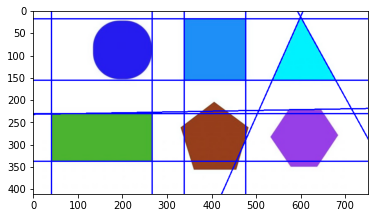

In [11]:
plt.imshow(img)
plt.show()

In [12]:
# reference: https://docs.opencv.org/master/d6/d10/tutorial_py_houghlines.html
def my_hough(img, rho=1, theta=np.pi/180, threshold=100):
    img_height, img_width = img.shape[:2]
    diagonal_length = int(math.sqrt(img_height*img_height + img_width*img_width))
    
    print('[My Hough] Img Height: %d | Img Width: %d | Img Diagonal Length: %d' % (img_height, img_width, diagonal_length))
    
    num_rho = int(diagonal_length / rho)
    num_theta = int(np.pi / theta)
    
    edge_matrix = np.zeros([2*num_rho+1, num_theta]) # dim: num_rho x num_theta
    
    print('[My Hough] Edge Matrix Dim: %d x %d' % (edge_matrix.shape[0], edge_matrix.shape[1]))
    
    idx	= np.squeeze(cv2.findNonZero(img)) # dim: 4468 x 2 (example, number of rows = number of white pixel on image processed by canny edge algorithm!)
    
    range_theta = np.arange(0, np.pi, theta)
    theta_matrix = np.stack((np.cos(np.copy(range_theta)), np.sin(np.copy(range_theta))), axis=-1) # dim: 180 x 2
    
    vote_matrix = np.dot(idx, np.transpose(theta_matrix)) # => (4468 x 2) * (180 x 2)T = (4468 x 2) * (2 x 180) = 4468 x 180
    print('[My Hough] Vote Matrix Dim: %d x %d' % (vote_matrix.shape[0], vote_matrix.shape[1]))
    
    # loop on vote matrix and accumulate values on edge matrix
    for vr in range(vote_matrix.shape[0]):
        for vc in range(vote_matrix.shape[1]):
            rho_pos = int(round(vote_matrix[vr, vc]))+num_rho
            edge_matrix[rho_pos, vc] += 1
    
    print('[My Hough] Sum of Edge Matrix = %d | Max = %d | Min = %d' % (int(np.sum(edge_matrix)), int(np.max(edge_matrix)), int(np.min(edge_matrix))))
    
    line_idx = np.where(edge_matrix > threshold)
    
    rho_values = list(line_idx[0])
    rho_values = [r-num_rho for r in rho_values]
    theta_values = list(line_idx[1])
    theta_values = [t/180.0*np.pi for t in theta_values]
    
    line_idx = list(zip(rho_values, theta_values))
    line_idx = [[li] for li in line_idx]
    return line_idx

def main():
    # read image
    img = cv2.imread('geometry.jpg')
    # convert to gray scale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) # color -> gray
    edges = cv2.Canny(gray, 50, 150, apertureSize=3) # https://docs.opencv.org/2.4/modules/imgproc/doc/feature_detection.html?highlight=canny#canny
    cv2.imwrite('geo_canny.jpg', edges)

    # USE BUILT-IN OPENCV HOUGH ALGORITHM
    lines = cv2.HoughLines(edges, rho=1, theta=np.pi/180, threshold=100) # https://docs.opencv.org/master/dd/d1a/group__imgproc__feature.html#ga46b4e588934f6c8dfd509cc6e0e4545a
    for line in lines:
        rho, theta = line[0]
        a = np.cos(theta)
        b = np.sin(theta)
        x0 = a*rho
        y0 = b*rho
        x1 = int(x0 + 1000*(-b))
        y1 = int(y0 + 1000*(a))
        x2 = int(x0 - 1000*(-b))
        y2 = int(y0 - 1000*(a))
        cv2.line(img,(x1,y1),(x2,y2),(0,0,255),2)    
    cv2.imwrite('geo_hough.jpg',img)
    print('[OpenCV Hough] Number of lines: %d' % len(lines))
    
    # IMPLEMENT HOUGH ALGORITHM MYSELF!
    lines = my_hough(edges, rho=1, theta=np.pi/180, threshold=100)
    for line in lines:
        rho, theta = line[0]
        a = np.cos(theta)
        b = np.sin(theta)
        x0 = a*rho
        y0 = b*rho
        x1 = int(x0 + 1000*(-b))
        y1 = int(y0 + 1000*(a))
        x2 = int(x0 - 1000*(-b))
        y2 = int(y0 - 1000*(a))
        cv2.line(img,(x1,y1),(x2,y2),(0,0,255),2)    
    cv2.imwrite('geo_myhough.jpg',img)
    print('[My Hough] Number of lines: %d' % len(lines))

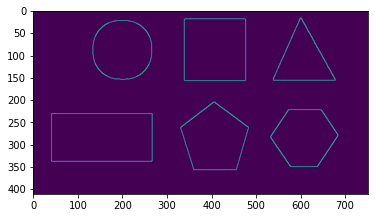

In [14]:
plt.imshow(edges)
plt.show()

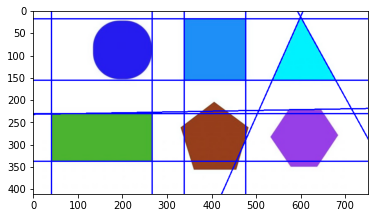

In [13]:
plt.imshow(img)
plt.show()